In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import (AutoLocator, AutoMinorLocator, 
    FixedLocator, FixedFormatter, LogLocator, StrMethodFormatter)
import astropy
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import (ImageNormalize, AsinhStretch)
import astropy.constants as const
import astropy.units as u
from scipy.io import readsav
import sunpy
import sunpy.map
import irispy
import irispy.io
import cmcrameri.cm as cmcm

In [2]:
def plot_colorbar(im, ax, width="3%", height="100%",loc="lower left",fontsize=14,
                  bbox_to_anchor=(1.02, 0., 1, 1),orientation="vertical"):
    clb_ax = inset_axes(ax,width=width,height=height,loc=loc,
                bbox_to_anchor=bbox_to_anchor,
                 bbox_transform=ax.transAxes,
                 borderpad=0)
    clb = plt.colorbar(im,pad = 0.05,orientation=orientation,ax=ax,cax=clb_ax)
    clb_ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    clb_ax.yaxis.get_offset_text().set_fontsize(fontsize)
    clb_ax.tick_params(labelsize=fontsize)
    return clb, clb_ax

In [3]:
SiIV_1393_fitres_file = readsav("../../src/IRIS/20221024/2322/fit_res/SiIV_1393_raster0.sav",verbose=True)

--------------------------------------------------
Date: Thu Feb 15 09:12:15 2024
User: yjzhu
Host: NB-RES-YINGJIE
--------------------------------------------------
Format: 12
Architecture: x86_64
Operating System: linux
IDL Version: 8.8.3
--------------------------------------------------
Successfully read 12 records of which:
 - 9 are of type VARIABLE
 - 1 are of type TIMESTAMP
 - 1 are of type VERSION
--------------------------------------------------
Available variables:
 - int [<class 'numpy.ndarray'>]
 - int_err [<class 'numpy.ndarray'>]
 - vel [<class 'numpy.ndarray'>]
 - vel_err [<class 'numpy.ndarray'>]
 - wid [<class 'numpy.ndarray'>]
 - wid_err [<class 'numpy.ndarray'>]
 - chi2 [<class 'numpy.ndarray'>]
 - refwvl [<class 'numpy.ndarray'>]
 - wave_corr_fuv [<class 'numpy.ndarray'>]
--------------------------------------------------


In [4]:
SiIV_1393_fitres_file["refwvl"]

array([1393.75500488], dtype='>f8')

In [5]:
raster_header_0 = fits.getheader("../../src/IRIS/20221024/2322/iris_l2_20221024_232249_3600609177_raster_t000_r00000.fits",ext=0)
raster_header_SiIV = fits.getheader("../../src/IRIS/20221024/2322/iris_l2_20221024_232249_3600609177_raster_t000_r00000.fits",ext=3)
raster_header_CII = fits.getheader("../../src/IRIS/20221024/2322/iris_l2_20221024_232249_3600609177_raster_t000_r00000.fits",ext=1)
raster_header_MgII = fits.getheader("../../src/IRIS/20221024/2322/iris_l2_20221024_232249_3600609177_raster_t000_r00000.fits",ext=6)

In [6]:
raster_header_0

SIMPLE  =                    T / Written by IDL:  Thu Jan 26 03:34:12 2023      
BITPIX  =                   16 / Number of bits per data pixel                  
NAXIS   =                    0 / Number of data axes                            
EXTEND  =                    T / FITS data may contain extensions               
DATE    = '2023-01-26'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
TELESCOP= 'IRIS    '           /                                                
INSTRUME= 'SPEC    '           /                                                
DATA_LEV=              2.00000 /                                                
LVL_NUM =              2.00000 /                                                
VER_RF2 = 'L12-2019-08-08'     /                                                
DATE_RF2= '2023-01-26T10:25:

In [7]:
raster_header_SiIV

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                   16 / Number of bits per data pixel                  
NAXIS   =                    3 / Number of data axes                            
NAXIS1  =                   97 /                                                
NAXIS2  =                  548 /                                                
NAXIS3  =                  320 /                                                
PCOUNT  =                    0 / No Group Parameters                            
GCOUNT  =                    1 / One Data Group                                 
BSCALE  =                 0.25 /                                                
BZERO   =                 7992 /                                                
CDELT1  =      0.0508799999952 /                                                
CDELT2  =             0.332700 /                                                
CDELT3  =       0.3492020394

In [8]:
raster_SiIV_celestial_wcs = WCS(raster_header_SiIV).celestial.swapaxes(0,1)
raster_SiIV_celestial_header = raster_SiIV_celestial_wcs.to_header()
raster_SiIV_celestial_header["INSTRUME"] = raster_header_0["INSTRUME"]
raster_SiIV_celestial_header["TELESCOP"] = raster_header_0["TELESCOP"]
raster_SiIV_celestial_header["DATE_OBS"] = raster_header_0["DATE_OBS"]
raster_SiIV_celestial_header["DATE_END"] = raster_header_0["DATE_END"]

In [9]:
SiIV_1393_mask = None

In [10]:
SiIV_1393_int_map = sunpy.map.Map(SiIV_1393_fitres_file["int"],raster_SiIV_celestial_header,
                                  mask=SiIV_1393_mask).submap([0,20]*u.pix,top_right=[320,508]*u.pix)
SiIV_1393_int_map.plot_settings["cmap"] = "irissji1400"
SiIV_1393_int_map.plot_settings["norm"] = ImageNormalize(vmin=0,vmax=1e4,stretch=AsinhStretch(0.1))

In [11]:
SiIV_1393_vel_map = sunpy.map.Map(SiIV_1393_fitres_file["vel"] + SiIV_1393_fitres_file["wave_corr_fuv"][np.newaxis,:]/1393.755*const.c.to_value(u.km/u.s),
                                  raster_SiIV_celestial_header,mask=SiIV_1393_mask).submap([0,20]*u.pix,top_right=[320,508]*u.pix)
SiIV_1393_vel_map.plot_settings["cmap"] = "RdBu_r"
SiIV_1393_vel_map.plot_settings["norm"] = ImageNormalize(vmin=-30,vmax=30)

In [13]:
SiIV_1393_veff = np.sqrt(SiIV_1393_fitres_file["wid"]**2 - (25.85e-3)**2)/1393.755/np.sqrt(4*np.log(2))*const.c.to_value(u.km/u.s)
SiIV_1393_vth2 = np.sqrt(2*const.k_B*10**4.9*u.K/const.u/28.0855).to_value(u.km/u.s)
SiIV_1393_vnth = np.sqrt(SiIV_1393_veff**2 - SiIV_1393_vth2**2)
SiIV_1393_vnth_map = sunpy.map.Map(SiIV_1393_vnth,raster_SiIV_celestial_header,
                                   mask=SiIV_1393_mask).submap([0,20]*u.pix,top_right=[320,508]*u.pix)   
SiIV_1393_vnth_map.plot_settings["cmap"] = cmcm.batlowK
SiIV_1393_vnth_map.plot_settings["norm"] = ImageNormalize(vmin=5,vmax=30)

/tmp/ipykernel_789869/796652040.py:3: RuntimeWarning: invalid value encountered in sqrt
  SiIV_1393_vnth = np.sqrt(SiIV_1393_veff**2 - SiIV_1393_vth2**2)


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hglt_obs,hgln_obs
For frame 'heliographic_carrington' the following metadata is missing: dsun_obs,crln_obs,crlt_obs
 [sunpy.map.mapbase]


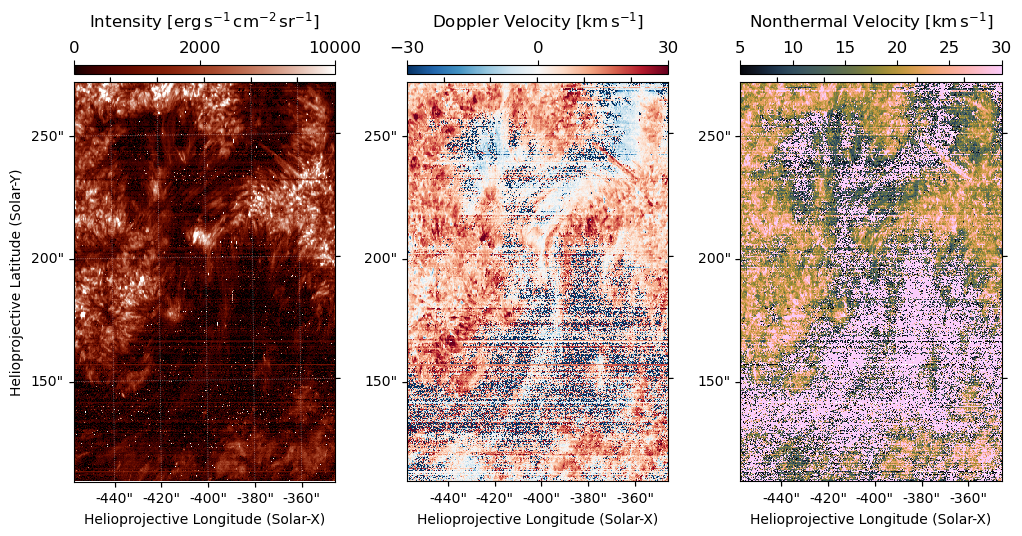

In [14]:
fig = plt.figure(figsize=(10,8),layout="constrained")

ax1 = fig.add_subplot(131,projection=SiIV_1393_int_map)
im1 = SiIV_1393_int_map.plot(axes=ax1)
clb1, clb_ax1 = plot_colorbar(im1,ax1,width="100%",height="8%",fontsize=12,
              bbox_to_anchor=(0,1.02,1,0.3),
              orientation="horizontal")
clb_ax1.tick_params(top=True,labeltop=True,labelbottom=False,bottom=False,labelsize=12)
clb_ax1.set_xticks([0,2000,10000])
ax1.set_title(r"Intensity [$\rm erg\,s^{-1}\,cm^{-2}\,sr^{-1}$]",fontsize=12,pad=40)


ax2 = fig.add_subplot(132,projection=SiIV_1393_vel_map)
im2 = SiIV_1393_vel_map.plot(axes=ax2)
clb2, clb_ax2 = plot_colorbar(im2,ax2,width="100%",height="8%",fontsize=12,
              bbox_to_anchor=(0,1.02,1,0.3),
              orientation="horizontal")
clb_ax2.tick_params(top=True,labeltop=True,labelbottom=False,bottom=False,labelsize=12)
clb_ax2.set_xticks([-30,0,30])
ax2.set_title(r"Doppler Velocity [$\rm km\,s^{-1}$]",fontsize=12,pad=40)

ax3 = fig.add_subplot(133,projection=SiIV_1393_vnth_map)
im3 = SiIV_1393_vnth_map.plot(axes=ax3)
clb3, clb_ax3 = plot_colorbar(im3,ax3,width="100%",height="8%",fontsize=12,
              bbox_to_anchor=(0,1.02,1,0.3),
              orientation="horizontal")
clb_ax3.tick_params(top=True,labeltop=True,labelbottom=False,bottom=False,labelsize=12)
ax3.set_title(r"Nonthermal Velocity [$\rm km\,s^{-1}$]",fontsize=12,pad=40)

for ax_ in (ax2,ax3):
    ax_.set_ylabel(' ')

In [17]:
CII_fitres_file = readsav("../../src/IRIS/20221024/2322/fit_res/CII_1334_raster0.sav",verbose=True)

--------------------------------------------------
Date: Thu Feb 15 09:25:25 2024
User: yjzhu
Host: NB-RES-YINGJIE
--------------------------------------------------
Format: 12
Architecture: x86_64
Operating System: linux
IDL Version: 8.8.3
--------------------------------------------------
Successfully read 12 records of which:
 - 9 are of type VARIABLE
 - 1 are of type TIMESTAMP
 - 1 are of type VERSION
--------------------------------------------------
Available variables:
 - int [<class 'numpy.ndarray'>]
 - int_err [<class 'numpy.ndarray'>]
 - vel [<class 'numpy.ndarray'>]
 - vel_err [<class 'numpy.ndarray'>]
 - wid [<class 'numpy.ndarray'>]
 - wid_err [<class 'numpy.ndarray'>]
 - chi2 [<class 'numpy.ndarray'>]
 - refwvl [<class 'numpy.ndarray'>]
 - wave_corr_fuv [<class 'numpy.ndarray'>]
--------------------------------------------------


In [18]:
raster_CII_celestial_wcs = WCS(raster_header_CII).celestial.swapaxes(0,1)
raster_CII_celestial_header = raster_CII_celestial_wcs.to_header()
raster_CII_celestial_header["INSTRUME"] = raster_header_0["INSTRUME"]
raster_CII_celestial_header["TELESCOP"] = raster_header_0["TELESCOP"]
raster_CII_celestial_header["DATE_OBS"] = raster_header_0["DATE_OBS"]
raster_CII_celestial_header["DATE_END"] = raster_header_0["DATE_END"]

In [20]:
CII_1334_mask = None

In [27]:
CII_int_map = sunpy.map.Map(CII_fitres_file["int"],raster_CII_celestial_header,
                            mask=CII_1334_mask).submap([0,20]*u.pix,top_right=[320,508]*u.pix)
CII_int_map.plot_settings["cmap"] = "irissji1330"
CII_int_map.plot_settings["norm"] = ImageNormalize(vmin=0,vmax=1e4,stretch=AsinhStretch(0.1))

CII_vel_map = sunpy.map.Map(CII_fitres_file["vel"] + CII_fitres_file["wave_corr_fuv"][np.newaxis,:]/1334.5323*const.c.to_value(u.km/u.s),
                            raster_CII_celestial_header,mask=CII_1334_mask).submap([0,20]*u.pix,top_right=[320,508]*u.pix)
CII_vel_map.plot_settings["cmap"] = "RdBu_r"
CII_vel_map.plot_settings["norm"] = ImageNormalize(vmin=-30,vmax=30)

CII_veff = np.sqrt(CII_fitres_file["wid"]**2 - (17.03e-3)**2)/1334.532/np.sqrt(4*np.log(2))*const.c.to_value(u.km/u.s)
CII_vth2 = np.sqrt(2*const.k_B*10**4.9*u.K/const.u/12.0107).to_value(u.km/u.s)
CII_vnth = np.sqrt(CII_veff**2 - CII_vth2**2)
CII_vnth_map = sunpy.map.Map(CII_vnth,raster_CII_celestial_header,
                             mask=CII_1334_mask).submap([0,20]*u.pix,top_right=[320,508]*u.pix)
CII_vnth_map.plot_settings["cmap"] = cmcm.batlowK
CII_vnth_map.plot_settings["norm"] = ImageNormalize(vmin=5,vmax=30)


/tmp/ipykernel_789869/4051641757.py:13: RuntimeWarning: invalid value encountered in sqrt
  CII_vnth = np.sqrt(CII_veff**2 - CII_vth2**2)


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hglt_obs,hgln_obs
For frame 'heliographic_carrington' the following metadata is missing: dsun_obs,crln_obs,crlt_obs
 [sunpy.map.mapbase]


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hglt_obs,hgln_obs
For frame 'heliographic_carrington' the following metadata is missing: dsun_obs,crln_obs,crlt_obs
 [sunpy.map.mapbase]


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hglt_obs,hgln_obs
For frame 'heliographic_carrington' the following metadata is missing: dsun_obs,crln_obs,crlt_obs
 [sunpy.map.mapbase]


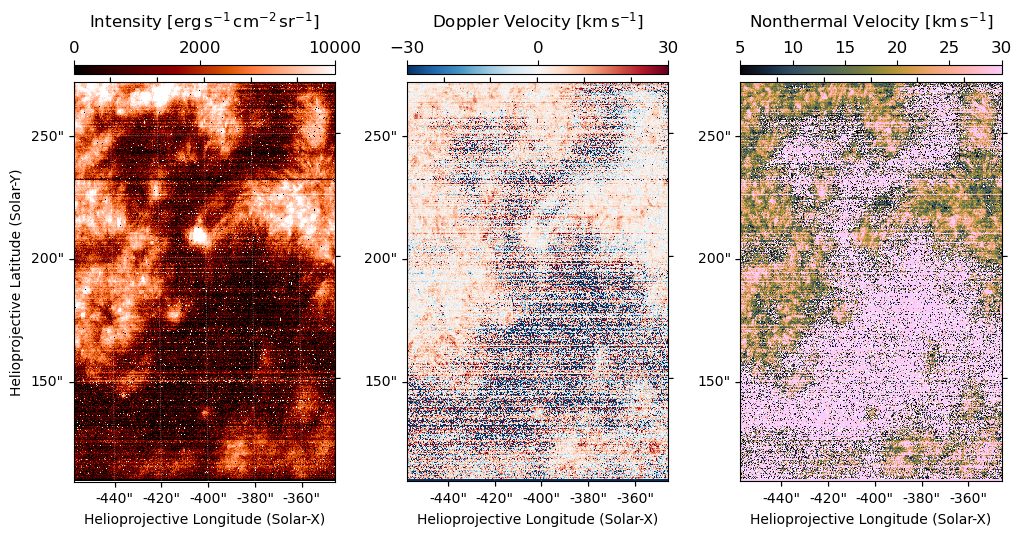

In [28]:
fig = plt.figure(figsize=(10,8),layout="constrained")

ax1 = fig.add_subplot(131,projection=CII_int_map)
im1 = CII_int_map.plot(axes=ax1)
clb1, clb_ax1 = plot_colorbar(im1,ax1,width="100%",height="8%",fontsize=12,
              bbox_to_anchor=(0,1.02,1,0.3),
              orientation="horizontal")
clb_ax1.tick_params(top=True,labeltop=True,labelbottom=False,bottom=False,labelsize=12)
clb_ax1.set_xticks([0,2000,10000])
ax1.set_title(r"Intensity [$\rm erg\,s^{-1}\,cm^{-2}\,sr^{-1}$]",fontsize=12,pad=40)

ax2 = fig.add_subplot(132,projection=CII_vel_map)
im2 = CII_vel_map.plot(axes=ax2)
clb2, clb_ax2 = plot_colorbar(im2,ax2,width="100%",height="8%",fontsize=12,
              bbox_to_anchor=(0,1.02,1,0.3),
              orientation="horizontal")
clb_ax2.tick_params(top=True,labeltop=True,labelbottom=False,bottom=False,labelsize=12)
clb_ax2.set_xticks([-30,0,30])
ax2.set_title(r"Doppler Velocity [$\rm km\,s^{-1}$]",fontsize=12,pad=40)

ax3 = fig.add_subplot(133,projection=CII_vnth_map)
im3 = CII_vnth_map.plot(axes=ax3)
clb3, clb_ax3 = plot_colorbar(im3,ax3,width="100%",height="8%",fontsize=12,
                bbox_to_anchor=(0,1.02,1,0.3),
                orientation="horizontal")
clb_ax3.tick_params(top=True,labeltop=True,labelbottom=False,bottom=False,labelsize=12)
# clb_ax3.set_xticks([5,10,])
ax3.set_title(r"Nonthermal Velocity [$\rm km\,s^{-1}$]",fontsize=12,pad=40)

for ax_ in (ax2,ax3):
    ax_.set_ylabel(' ')


In [34]:
MgII_fitres_file = readsav("../../src/IRIS/20221024/2322/fit_res/MgII_raster0.sav",verbose=True)

--------------------------------------------------
Date: Thu Feb 15 09:03:02 2024
User: yjzhu
Host: NB-RES-YINGJIE
--------------------------------------------------
Format: 12
Architecture: x86_64
Operating System: linux
IDL Version: 8.8.3
--------------------------------------------------
Successfully read 7 records of which:
 - 4 are of type VARIABLE
 - 1 are of type TIMESTAMP
 - 1 are of type VERSION
--------------------------------------------------
Available variables:
 - lc [<class 'numpy.ndarray'>]
 - rp [<class 'numpy.ndarray'>]
 - bp [<class 'numpy.ndarray'>]
 - wave_corr_nuv [<class 'numpy.ndarray'>]
--------------------------------------------------


In [35]:
raster_MgII_celestial_wcs = WCS(raster_header_MgII).celestial.swapaxes(0,1)
raster_MgII_celestial_header = raster_MgII_celestial_wcs.to_header()
raster_MgII_celestial_header["INSTRUME"] = raster_header_0["INSTRUME"]
raster_MgII_celestial_header["TELESCOP"] = raster_header_0["TELESCOP"]
raster_MgII_celestial_header["DATE_OBS"] = raster_header_0["DATE_OBS"]
raster_MgII_celestial_header["DATE_END"] = raster_header_0["DATE_END"]

In [36]:
MgII_k_mask = None
MgII_h_mask = None

In [46]:
MgII_k_lc_int_map = sunpy.map.Map(MgII_fitres_file["lc"][:,:,1,0].T,raster_MgII_celestial_header,
                                  mask=MgII_h_mask).submap([0,20]*u.pix,top_right=[320,508]*u.pix)
MgII_k_lc_int_map.plot_settings["cmap"] = "irissji2796"
MgII_k_lc_int_map.plot_settings["norm"] = ImageNormalize(vmin=0,vmax=2e3,stretch=AsinhStretch(0.1))

MgII_k_lc_vel_map = sunpy.map.Map(MgII_fitres_file["lc"][:,:,0,0].T + MgII_fitres_file["wave_corr_nuv"][np.newaxis,:]/2796.351*const.c.to_value(u.km/u.s),
                                  raster_MgII_celestial_header,mask=MgII_h_mask).submap([0,20]*u.pix,top_right=[320,508]*u.pix)
MgII_k_lc_vel_map.plot_settings["cmap"] = "RdBu_r"
MgII_k_lc_vel_map.plot_settings["norm"] = ImageNormalize(vmin=-15,vmax=15)

MgII_k_bp_int_map = sunpy.map.Map(MgII_fitres_file["bp"][:,:,1,0].T,raster_MgII_celestial_header,
                                    mask=MgII_h_mask).submap([0,20]*u.pix,top_right=[320,508]*u.pix)
MgII_k_bp_int_map.plot_settings["cmap"] = "irissji2796"
MgII_k_bp_int_map.plot_settings["norm"] = ImageNormalize(vmin=0,vmax=2e3,stretch=AsinhStretch(0.1))

MgII_k_bp_vel_map = sunpy.map.Map(MgII_fitres_file["bp"][:,:,0,0].T + MgII_fitres_file["wave_corr_nuv"][np.newaxis,:]/2796.351*const.c.to_value(u.km/u.s),
                                    raster_MgII_celestial_header,mask=MgII_h_mask).submap([0,20]*u.pix,top_right=[320,508]*u.pix)
MgII_k_bp_vel_map.plot_settings["cmap"] = "RdBu_r"
MgII_k_bp_vel_map.plot_settings["norm"] = ImageNormalize(vmin=-30,vmax=0)

MgII_k_rp_int_map = sunpy.map.Map(MgII_fitres_file["rp"][:,:,1,0].T,raster_MgII_celestial_header,
                                    mask=MgII_h_mask).submap([0,20]*u.pix,top_right=[320,508]*u.pix)
MgII_k_rp_int_map.plot_settings["cmap"] = "irissji2796"
MgII_k_rp_int_map.plot_settings["norm"] = ImageNormalize(vmin=0,vmax=2e3,stretch=AsinhStretch(0.1))

MgII_k_rp_vel_map = sunpy.map.Map(MgII_fitres_file["rp"][:,:,0,0].T + MgII_fitres_file["wave_corr_nuv"][np.newaxis,:]/2796.351*const.c.to_value(u.km/u.s),
                                    raster_MgII_celestial_header,mask=MgII_h_mask).submap([0,20]*u.pix,top_right=[320,508]*u.pix)
MgII_k_rp_vel_map.plot_settings["cmap"] = "RdBu_r"
MgII_k_rp_vel_map.plot_settings["norm"] = ImageNormalize(vmin=0,vmax=30)


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hglt_obs,hgln_obs
For frame 'heliographic_carrington' the following metadata is missing: dsun_obs,crln_obs,crlt_obs
 [sunpy.map.mapbase]


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hglt_obs,hgln_obs
For frame 'heliographic_carrington' the following metadata is missing: dsun_obs,crln_obs,crlt_obs
 [sunpy.map.mapbase]


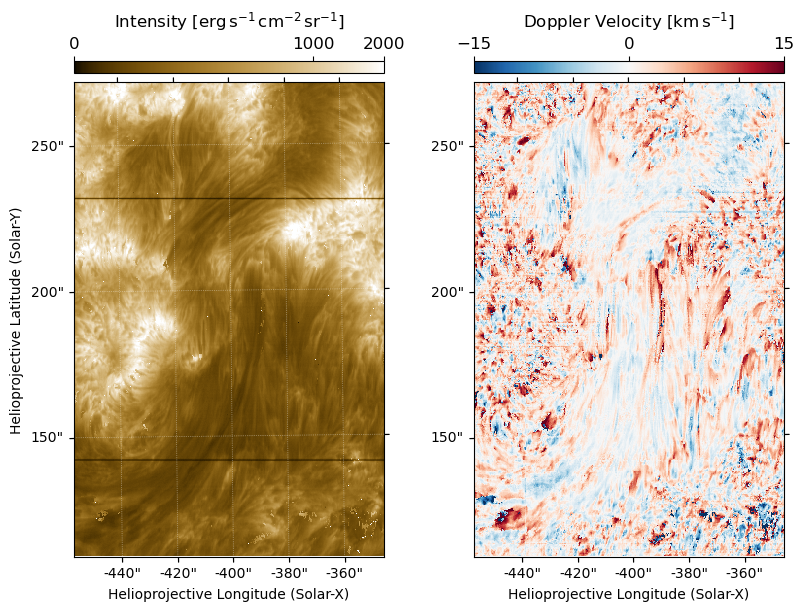

In [47]:
fig = plt.figure(figsize=(8,6),layout="constrained")

ax1 = fig.add_subplot(121,projection=MgII_k_lc_int_map)
im1 = MgII_k_lc_int_map.plot(axes=ax1)
clb1, clb_ax1 = plot_colorbar(im1,ax1,width="100%",height="8%",fontsize=12,
              bbox_to_anchor=(0,1.02,1,0.3),
              orientation="horizontal")
clb_ax1.tick_params(top=True,labeltop=True,labelbottom=False,bottom=False,labelsize=12)
clb_ax1.set_xticks([0,1000,2000])
ax1.set_title(r"Intensity [$\rm erg\,s^{-1}\,cm^{-2}\,sr^{-1}$]",fontsize=12,pad=40)

ax2 = fig.add_subplot(122,projection=MgII_k_lc_vel_map)
im2 = MgII_k_lc_vel_map.plot(axes=ax2)
clb2, clb_ax2 = plot_colorbar(im2,ax2,width="100%",height="8%",fontsize=12,
              bbox_to_anchor=(0,1.02,1,0.3),
              orientation="horizontal")
clb_ax2.tick_params(top=True,labeltop=True,labelbottom=False,bottom=False,labelsize=12)
clb_ax2.set_xticks([-15,0,15])
ax2.set_title(r"Doppler Velocity [$\rm km\,s^{-1}$]",fontsize=12,pad=40)

ax2.set_ylabel(' ')

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hglt_obs,hgln_obs
For frame 'heliographic_carrington' the following metadata is missing: dsun_obs,crln_obs,crlt_obs
 [sunpy.map.mapbase]


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


For frame 'heliographic_stonyhurst' the following metadata is missing: dsun_obs,hglt_obs,hgln_obs
For frame 'heliographic_carrington' the following metadata is missing: dsun_obs,crln_obs,crlt_obs
 [sunpy.map.mapbase]


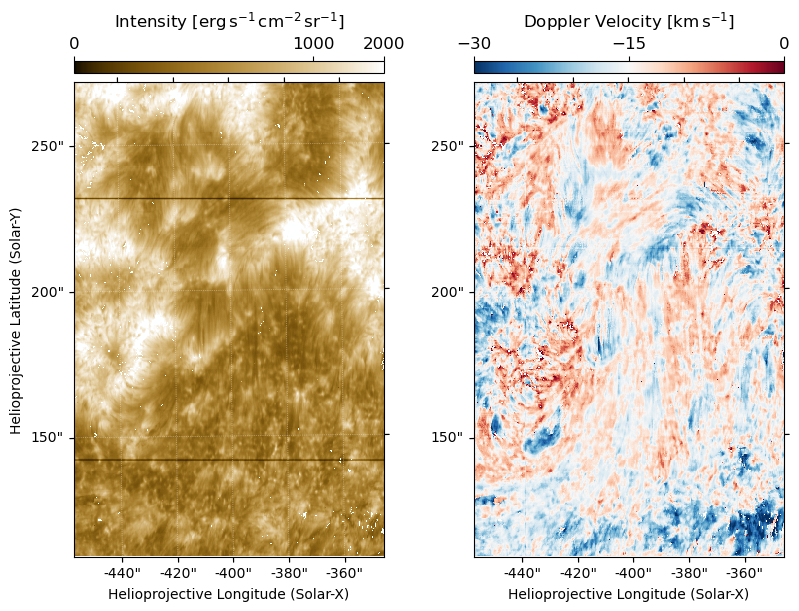

In [48]:
fig = plt.figure(figsize=(8,6),layout="constrained")

ax1 = fig.add_subplot(121,projection=MgII_k_bp_int_map)
im1 = MgII_k_bp_int_map.plot(axes=ax1)
clb1, clb_ax1 = plot_colorbar(im1,ax1,width="100%",height="8%",fontsize=12,
              bbox_to_anchor=(0,1.02,1,0.3),
              orientation="horizontal")
clb_ax1.tick_params(top=True,labeltop=True,labelbottom=False,bottom=False,labelsize=12)
clb_ax1.set_xticks([0,1000,2000])
ax1.set_title(r"Intensity [$\rm erg\,s^{-1}\,cm^{-2}\,sr^{-1}$]",fontsize=12,pad=40)

ax2 = fig.add_subplot(122,projection=MgII_k_bp_vel_map)
im2 = MgII_k_bp_vel_map.plot(axes=ax2)
clb2, clb_ax2 = plot_colorbar(im2,ax2,width="100%",height="8%",fontsize=12,
              bbox_to_anchor=(0,1.02,1,0.3),
              orientation="horizontal")
clb_ax2.tick_params(top=True,labeltop=True,labelbottom=False,bottom=False,labelsize=12)
clb_ax2.set_xticks([-30,-15,0])
ax2.set_title(r"Doppler Velocity [$\rm km\,s^{-1}$]",fontsize=12,pad=40)

ax2.set_ylabel(' ')

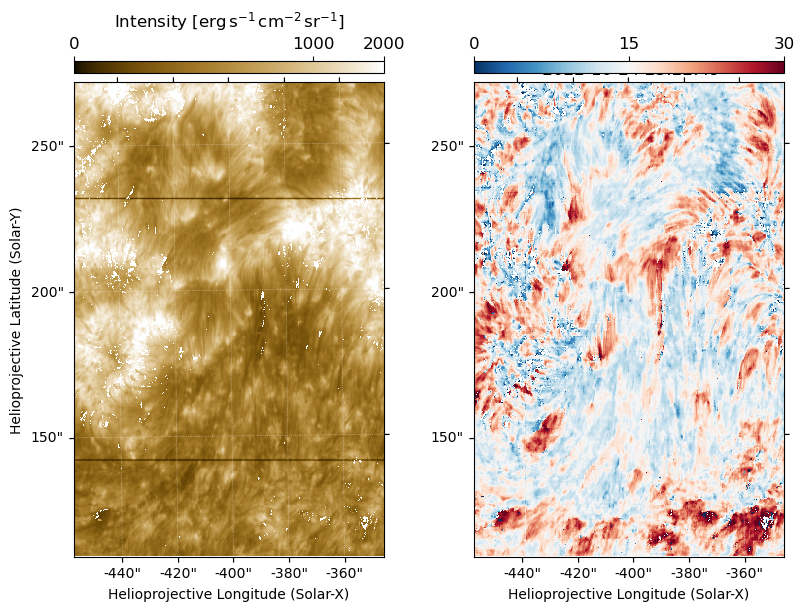

In [49]:
fig = plt.figure(figsize=(8,6),layout="constrained")

ax1 = fig.add_subplot(121,projection=MgII_k_rp_int_map)
im1 = MgII_k_rp_int_map.plot(axes=ax1)
clb1, clb_ax1 = plot_colorbar(im1,ax1,width="100%",height="8%",fontsize=12,
              bbox_to_anchor=(0,1.02,1,0.3),
              orientation="horizontal")
clb_ax1.tick_params(top=True,labeltop=True,labelbottom=False,bottom=False,labelsize=12)
clb_ax1.set_xticks([0,1000,2000])
ax1.set_title(r"Intensity [$\rm erg\,s^{-1}\,cm^{-2}\,sr^{-1}$]",fontsize=12,pad=40)

ax2 = fig.add_subplot(122,projection=MgII_k_rp_vel_map)
im2 = MgII_k_rp_vel_map.plot(axes=ax2)
clb2, clb_ax2 = plot_colorbar(im2,ax2,width="100%",height="8%",fontsize=12,
              bbox_to_anchor=(0,1.02,1,0.3),
              orientation="horizontal")
clb_ax2.tick_params(top=True,labeltop=True,labelbottom=False,bottom=False,labelsize=12)
clb_ax2.set_xticks([0,15,30])

ax2.set_ylabel(' ')